In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
dim_date=pd.read_csv(r'C:\Ongoing course\Projects\RPC12_Input_For_Participants\datasets\dim_date.csv')
electric_vehicle_sales_by_makers= pd.read_csv(r'C:\Ongoing course\Projects\RPC12_Input_For_Participants\datasets\electric_vehicle_sales_by_makers.csv')
electric_vehicle_sales_by_state= pd.read_csv(r'C:\Ongoing course\Projects\RPC12_Input_For_Participants\datasets\electric_vehicle_sales_by_state.csv')
# Display the first few rows of each DataFrame to inspect the data
dim_date.head(), electric_vehicle_sales_by_makers.head(), electric_vehicle_sales_by_state.head()

(        date  fiscal_year quarter
 0  01-Apr-21         2022      Q1
 1  01-May-21         2022      Q1
 2  01-Jun-21         2022      Q1
 3  01-Jul-21         2022      Q2
 4  01-Aug-21         2022      Q2,
         date vehicle_category         maker  electric_vehicles_sold
 0  01-Apr-21       2-Wheelers  OLA ELECTRIC                       0
 1  01-Apr-22       2-Wheelers      OKAYA EV                       0
 2  01-May-21       2-Wheelers  OLA ELECTRIC                       0
 3  01-Jun-21       2-Wheelers  OLA ELECTRIC                       0
 4  01-Jul-21       2-Wheelers  OLA ELECTRIC                       0,
         date   state vehicle_category  electric_vehicles_sold  \
 0  01-Apr-21  Sikkim       2-Wheelers                       0   
 1  01-Apr-21  Sikkim       4-Wheelers                       0   
 2  01-May-21  Sikkim       2-Wheelers                       0   
 3  01-May-21  Sikkim       4-Wheelers                       0   
 4  01-Jun-21  Sikkim       2-Wheelers      

In [3]:
dim_date.dtypes

date           object
fiscal_year     int64
quarter        object
dtype: object

In [4]:
dim_date['date']=pd.to_datetime(dim_date['date'])
dim_date.head()

,date,fiscal_year,quarter
0,2021-04-01,2022,Q1
1,2021-05-01,2022,Q1
2,2021-06-01,2022,Q1
3,2021-07-01,2022,Q2
4,2021-08-01,2022,Q2


In [5]:
dim_date.isnull().sum()

date           0
fiscal_year    0
quarter        0
dtype: int64

In [6]:
electric_vehicle_sales_by_makers.dtypes

date                      object
vehicle_category          object
maker                     object
electric_vehicles_sold     int64
dtype: object

In [7]:
electric_vehicle_sales_by_makers['date']=pd.to_datetime(electric_vehicle_sales_by_makers['date'])
electric_vehicle_sales_by_makers.dtypes

date                      datetime64[ns]
vehicle_category                  object
maker                             object
electric_vehicles_sold             int64
dtype: object

In [8]:
electric_vehicle_sales_by_makers.isnull().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

In [9]:
#Check for duplicate rows
electric_vehicle_sales_by_makers['maker'].unique()

array(['OLA ELECTRIC', 'OKAYA EV', 'BYD India', 'PCA Automobiles',
       'BMW India', 'Volvo Auto India', 'KIA Motors', 'Mercedes -Benz AG',
       'Tata Motors', 'MG Motor', 'Mahindra & Mahindra', 'Hyundai Motor',
       'HERO ELECTRIC', 'OKINAWA', 'AMPERE', 'ATHER', 'PURE EV', 'TVS',
       'REVOLT', 'BAJAJ', 'BEING', 'JITENDRA', 'OTHERS', 'BGAUSS',
       'BATTRE ELECTRIC', 'KINETIC GREEN'], dtype=object)

In [10]:
electric_vehicle_sales_by_makers.describe()

,date,electric_vehicles_sold
count,816,816.000000
mean,2022-09-21 03:30:00,2531.998775
min,2021-04-01 00:00:00,0.000000
25%,2022-01-01 00:00:00,42.000000
50%,2022-10-01 00:00:00,662.000000
75%,2023-07-01 00:00:00,2636.500000
max,2024-03-01 00:00:00,44630.000000
std,NaN,4771.077333


In [11]:
electric_vehicle_sales_by_state.dtypes

date                      object
state                     object
vehicle_category          object
electric_vehicles_sold     int64
total_vehicles_sold        int64
dtype: object

In [12]:
electric_vehicle_sales_by_state['date']=pd.to_datetime(electric_vehicle_sales_by_state['date'])
electric_vehicle_sales_by_state.dtypes

date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
dtype: object

In [13]:
electric_vehicle_sales_by_state.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [14]:
electric_vehicle_sales_by_state.describe()

,date,electric_vehicles_sold,total_vehicles_sold
count,2445,2445.000000,2445.000000
mean,2022-09-15 12:50:56.687116544,845.035174,23402.966053
min,2021-04-01 00:00:00,0.000000,1.000000
25%,2022-01-01 00:00:00,2.000000,1158.000000
50%,2022-09-01 00:00:00,54.000000,6098.000000
75%,2023-06-01 00:00:00,534.000000,29396.000000
max,2024-03-01 00:00:00,26668.000000,387983.000000
std,NaN,2185.167744,38353.266389


In [15]:
# Merge the datasets
merged_data =electric_vehicle_sales_by_makers.merge(dim_date, left_on='date', right_on='date')
merged_state_data = electric_vehicle_sales_by_state.merge(dim_date, left_on='date', right_on='date')
merged_data.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,2021-04-01,4-Wheelers,BYD India,0,2022,Q1
2,2021-04-01,4-Wheelers,PCA Automobiles,0,2022,Q1
3,2021-04-01,4-Wheelers,BMW India,0,2022,Q1
4,2021-04-01,4-Wheelers,Volvo Auto India,0,2022,Q1


In [16]:
merged_state_data.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1
2,2021-04-01,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1
3,2021-04-01,Arunachal Pradesh,2-Wheelers,0,1256,2022,Q1
4,2021-04-01,Arunachal Pradesh,4-Wheelers,0,724,2022,Q1


In [17]:
merged_state_data['state'].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Himachal Pradesh', 'Andhra Pradesh', 'Bihar',
       'Chandigarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Odisha',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andaman & Nicobar'], dtype=object)

In [18]:
# Replace 'Andaman & Nicobar' with 'Andaman & Nicobar Island'
merged_state_data['state'] = merged_state_data['state'].replace('Andaman & Nicobar', 'Andaman & Nicobar Island')
merged_state_data['state'].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Himachal Pradesh', 'Andhra Pradesh', 'Bihar',
       'Chandigarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Odisha',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [19]:
#merged_data.to_csv('merged_maker_data.csv',index=False)
#merged_state_data.to_csv('merged_state_data.csv',index=False)

### Question 1:List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [20]:
# Filter data for fiscal years 2023 and 2024 and for 2-wheelers
filtered_data=merged_data[
    (merged_data['fiscal_year'].isin([2023, 2024])) &
    (merged_data['vehicle_category'] == '2-Wheelers')
]
filtered_data.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
22,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1
33,2022-04-01,2-Wheelers,OLA ELECTRIC,13601,2023,Q1
34,2022-04-01,2-Wheelers,OKINAWA,11341,2023,Q1
35,2022-04-01,2-Wheelers,HERO ELECTRIC,6803,2023,Q1
36,2022-04-01,2-Wheelers,AMPERE,6864,2023,Q1


In [21]:
# Group by maker and sum the electric vehicles sold
maker_sales=filtered_data.groupby(['maker', 'fiscal_year'])['electric_vehicles_sold'].sum().unstack()


# Identify top 3 and bottom 3 makers for each year
top_3_makers_2023 = pd.DataFrame(maker_sales[2023].nlargest(3))
bottom_3_makers_2023 = pd.DataFrame(maker_sales[2023].nsmallest(3))
top_3_makers_2024 = pd.DataFrame(maker_sales[2024].nlargest(3))
bottom_3_makers_2024 = pd.DataFrame(maker_sales[2024].nsmallest(3))


In [22]:
top_3_makers_2023


,2023
maker,
OLA ELECTRIC,152583.0
OKINAWA,96945.0
HERO ELECTRIC,88993.0


In [23]:
bottom_3_makers_2023

,2023
maker,
JITENDRA,8563.0
BEING,11018.0
PURE EV,11556.0


In [24]:
top_3_makers_2024

,2024
maker,
OLA ELECTRIC,322489.0
TVS,180743.0
ATHER,107552.0


In [25]:
bottom_3_makers_2024

,2024
maker,
BATTRE ELECTRIC,4841.0
REVOLT,7254.0
KINETIC GREEN,9585.0


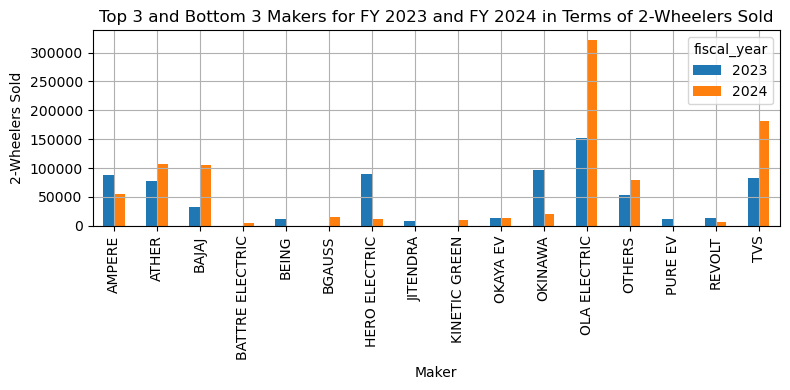

In [26]:
# Plot the data
maker_sales.plot(kind='bar', figsize=(8,4))
plt.xlabel('Maker')
plt.ylabel('2-Wheelers Sold')
plt.title('Top 3 and Bottom 3 Makers for FY 2023 and FY 2024 in Terms of 2-Wheelers Sold')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 2: Top 5 States with the Highest Penetration Rate in 2-Wheeler and 4-Wheeler EV Sales in FY 2024

In [27]:
# Filter data for fiscal year 2024
filtered_state_data_2024 = merged_state_data[merged_state_data['fiscal_year'] == 2024]
# Calculate penetration rate
penetration_rate_2024 = filtered_state_data_2024.groupby(['state', 'vehicle_category'])[['electric_vehicles_sold', 'total_vehicles_sold']].sum()
penetration_rate_2024['penetration_rate'] = penetration_rate_2024['electric_vehicles_sold'] / penetration_rate_2024['total_vehicles_sold']
penetration_rate_2024.head()

electric_vehicles_sold  \
state                    vehicle_category                           
Andaman & Nicobar Island 2-Wheelers                            20   
                         4-Wheelers                            15   
Andhra Pradesh           2-Wheelers                         31353   
                         4-Wheelers                          1830   
Arunachal Pradesh        2-Wheelers                             3   

                                           total_vehicles_sold  \
state                    vehicle_category                        
Andaman & Nicobar Island 2-Wheelers                       5249   
                         4-Wheelers                       1954   
Andhra Pradesh           2-Wheelers                     694105   
                         4-Wheelers                      88760   
Arunachal Pradesh        2-Wheelers                      14673   

                                           penetration_rate  
state                    vehicle_category                    
Andaman & Nicobar Island 2-Wheelers                0.003810  
                         4-Wheelers                0.007677  
Andhra Pradesh           2-Wheelers                0.045170  
                         4-Wheelers                0.020617  
Arunachal Pradesh        2-Wheelers                0.000204

In [28]:
# Separate data for 2-Wheelers and 4-Wheelers
penetration_rate_2w = penetration_rate_2024.xs('2-Wheelers', level='vehicle_category').nlargest(5, 'penetration_rate')
penetration_rate_4w = penetration_rate_2024.xs('4-Wheelers', level='vehicle_category').nlargest(5, 'penetration_rate')
penetration_rate_2w 

,electric_vehicles_sold,total_vehicles_sold,penetration_rate
state,,,
Goa,9768,54290,0.179923
Kerala,64769,478887,0.135249
Karnataka,148111,1279767,0.115733
Maharashtra,183052,1817343,0.100725
Delhi,38094,405218,0.094009


In [29]:
penetration_rate_4w

,electric_vehicles_sold,total_vehicles_sold,penetration_rate
state,,,
Kerala,9169,159227,0.057584
Chandigarh,1020,22651,0.045031
Delhi,8630,201130,0.042908
Karnataka,12878,302221,0.042611
Goa,1031,24234,0.042544


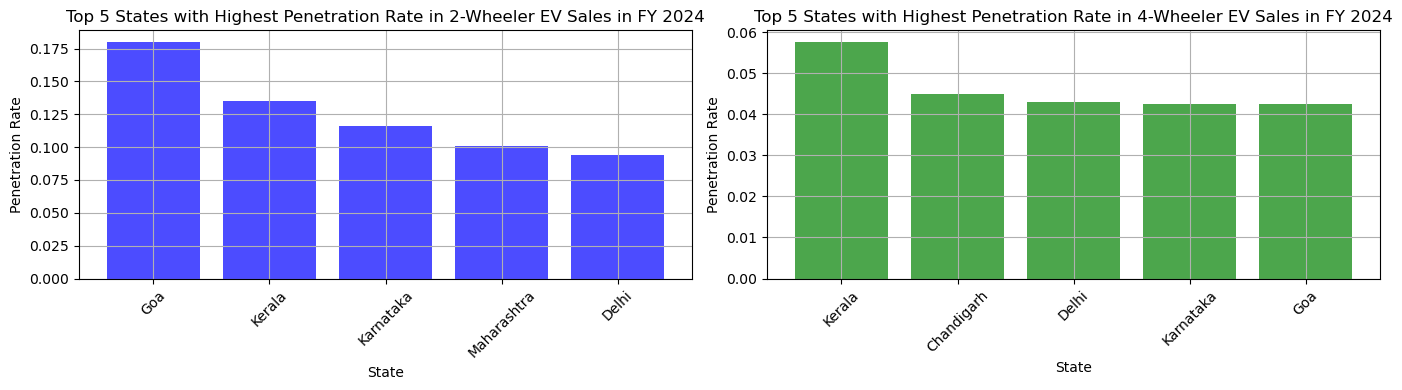

In [30]:
# Plot top 5 states for 2-Wheelers and 4-Wheelers
fig, ax = plt.subplots(1, 2, figsize=(14,4))

# Top 5 states for 2-Wheelers
ax[0].bar(penetration_rate_2w.index, penetration_rate_2w['penetration_rate'], color='blue', alpha=0.7)
ax[0].set_xlabel('State')
ax[0].set_ylabel('Penetration Rate')
ax[0].set_title('Top 5 States with Highest Penetration Rate in 2-Wheeler EV Sales in FY 2024')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True)

# Top 5 states for 4-Wheelers
ax[1].bar(penetration_rate_4w.index, penetration_rate_4w['penetration_rate'], color='green', alpha=0.7)
ax[1].set_xlabel('State')
ax[1].set_ylabel('Penetration Rate')
ax[1].set_title('Top 5 States with Highest Penetration Rate in 4-Wheeler EV Sales in FY 2024')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Question 3: States with Negative Penetration (Decline) in EV Sales from 2022 to 2024

In [31]:
# Calculate total EV sales for 2022 and 2024
state_sales_2022 = merged_state_data[merged_state_data['fiscal_year'] == 2022].groupby('state')['electric_vehicles_sold'].sum()
state_sales_2024 = merged_state_data[merged_state_data['fiscal_year'] == 2024].groupby('state')['electric_vehicles_sold'].sum()

In [32]:
# Calculate the change in sales
state_sales_change = state_sales_2024 - state_sales_2022

state_sales_change

state
Andaman & Nicobar Island        13
Andhra Pradesh               19255
Arunachal Pradesh               31
Assam                         2767
Bihar                        10240
Chandigarh                    2466
Chhattisgarh                 24006
DNH and DD                     163
Delhi                        30189
Goa                           9021
Gujarat                      66333
Haryana                       5867
Himachal Pradesh               605
Jammu and Kashmir              849
Jharkhand                     5117
Karnataka                   117878
Kerala                       60299
Ladakh                          19
Madhya Pradesh               35307
Maharashtra                 148795
Manipur                        101
Meghalaya                      129
Mizoram                        275
Nagaland                         8
Odisha                       29620
Puducherry                    2364
Punjab                        6670
Rajasthan                    46357
Sikkim        

In [33]:
# Filter for states with negative change
states_with_decline = state_sales_change[state_sales_change < 0].reset_index()
states_with_decline.columns = ['state', 'decline']
states_with_decline


,state,decline


### Question 4: What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

In [34]:
# Filter data for 4-wheelers and fiscal years 2022 to 2024
filtered_data_4w = merged_data[
    (merged_data['vehicle_category'] == '4-Wheelers')]

# Group by maker and quarter to get the total sales volume
quarterly_sales = filtered_data_4w.groupby(['maker', 'fiscal_year', 'quarter'])['electric_vehicles_sold'].sum().reset_index()

In [35]:
# Identify the top 5 makers based on total sales volume
top_5_makers_4w = quarterly_sales.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5)
top_5_makers_4w

maker
Tata Motors            88935
Mahindra & Mahindra    41193
MG Motor               13753
BYD India               2419
Hyundai Motor           2076
Name: electric_vehicles_sold, dtype: int64

In [36]:
# Filter for top 5 makers
quarterly_sales_top_5 = quarterly_sales[quarterly_sales['maker'].isin(top_5_makers_4w.index)]
quarterly_sales_top_5

,maker,fiscal_year,quarter,electric_vehicles_sold
12,BYD India,2022,Q1,0
13,BYD India,2022,Q2,0
14,BYD India,2022,Q3,1
15,BYD India,2022,Q4,32
16,BYD India,2023,Q1,81
17,BYD India,2023,Q2,113
18,BYD India,2023,Q3,103
19,BYD India,2023,Q4,623
20,BYD India,2024,Q1,406
21,BYD India,2024,Q2,310


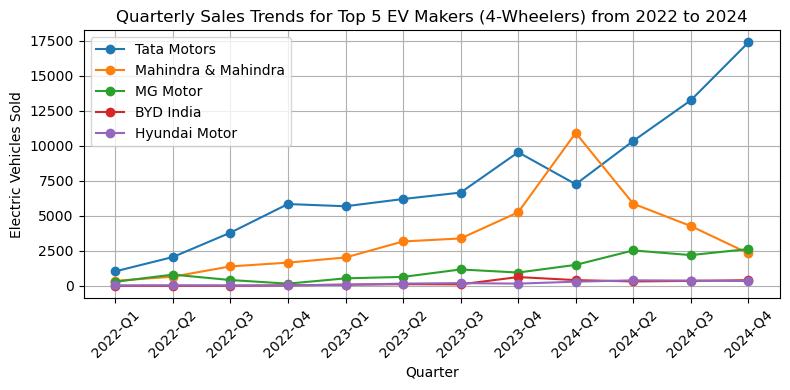

In [37]:
# Plot the quarterly sales trends for these top 5 makers
plt.figure(figsize=(8,4))
for maker in top_5_makers_4w.index:
    maker_data = quarterly_sales_top_5[quarterly_sales_top_5['maker'] == maker]
    plt.plot(maker_data['fiscal_year'].astype(str) + '-' + maker_data['quarter'], maker_data['electric_vehicles_sold'], marker='o', label=maker)

plt.title('Quarterly Sales Trends for Top 5 EV Makers (4-Wheelers) from 2022 to 2024')
plt.xlabel('Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 5: How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

In [38]:
# Filter data for Delhi and Karnataka for fiscal year 2024
filtered_data_delhi_kar = merged_state_data[
    (merged_state_data['state'].isin(['Delhi', 'Karnataka'])) &
    (merged_state_data['fiscal_year'] == 2024)]

filtered_data_delhi_kar.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
1650,2023-04-01,Delhi,4-Wheelers,551,14861,2024,Q1
1657,2023-04-01,Karnataka,4-Wheelers,762,22368,2024,Q1
1676,2023-04-01,Delhi,2-Wheelers,2738,28590,2024,Q1
1683,2023-04-01,Karnataka,2-Wheelers,9711,91491,2024,Q1
1715,2023-05-01,Delhi,4-Wheelers,787,16609,2024,Q1


In [39]:
# Calculate total EV sales and penetration rates for both states
sales_comparison = filtered_data_delhi_kar.groupby('state')[['electric_vehicles_sold', 'total_vehicles_sold']].sum().reset_index()
sales_comparison['penetration_rate'] = sales_comparison['electric_vehicles_sold'] / sales_comparison['total_vehicles_sold']
sales_comparison

,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate
0,Delhi,46724,606348,0.077058
1,Karnataka,160989,1581988,0.101764


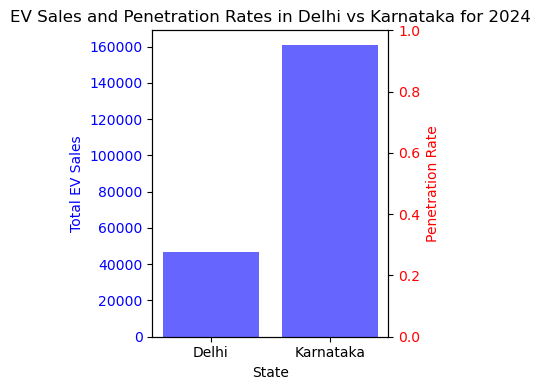

In [40]:
# Visualize the comparison
fig, ax1 = plt.subplots(figsize=(4,4))

# Bar plot for total EV sales
ax1.bar(sales_comparison['state'], sales_comparison['electric_vehicles_sold'], color='b', alpha=0.6, label='Total EV Sales')
ax1.set_xlabel('State')
ax1.set_ylabel('Total EV Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line plot for penetration rate
ax2 = ax1.twinx()
ax2.set_ylabel('Penetration Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('EV Sales and Penetration Rates in Delhi vs Karnataka for 2024')
fig.tight_layout()
plt.show()

### Question 6: List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

To calculate CAGR:


$\text{CAGR} = \left( \frac{V_f}{V_i} \right)^{\frac{1}{n}} - 0.5$


where:
- $V_f$ = value at the end of the period
- $V_i$ = value at the start of the period
- $n$ = number of years

In [41]:
# Calculate total sales for each maker across all years
total_sales = filtered_data_4w.groupby('maker')['electric_vehicles_sold'].sum()

# Identify the top 5 makers based on total sales
top_5_makers = total_sales.nlargest(5).index

# Filter data for the top 5 makers
top_5_data = filtered_data_4w[filtered_data_4w['maker'].isin(top_5_makers)]

# Calculate total sales for each maker in 2022 and 2024
sales_2022 = top_5_data[top_5_data['fiscal_year'] == 2022].groupby('maker')['electric_vehicles_sold'].sum()
sales_2024 = top_5_data[top_5_data['fiscal_year'] == 2024].groupby('maker')['electric_vehicles_sold'].sum()

In [57]:
# Join the sales data
sales_cagr = pd.DataFrame({'sales_2022': sales_2022, 'sales_2024': sales_2024}).dropna()

# Calculate CAGR
sales_cagr['CAGR'] = (((sales_cagr['sales_2024'] / sales_cagr['sales_2022']) ** (1 / 2)) - 1)

# Sort the DataFrame by total sales in 2024 for correct plotting order
sales_cagr = sales_cagr.loc[sales_cagr['CAGR'].sort_values(ascending=False).index]
sales_cagr

,sales_2022,sales_2024,CAGR
maker,,,
BYD India,33,1466,5.665151
Hyundai Motor,110,1390,2.554766
Mahindra & Mahindra,4042,23346,1.403301
MG Motor,1647,8829,1.315309
Tata Motors,12708,48181,0.947150


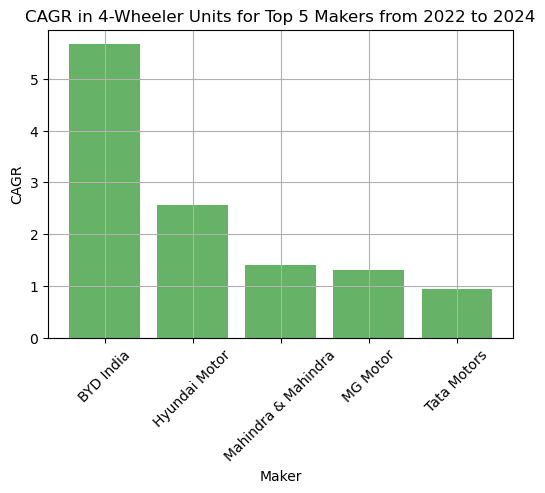

In [58]:
# Plot CAGR for top 5 makers
plt.figure(figsize=(6,4))
plt.bar(sales_cagr.index, sales_cagr['CAGR'], color='g', alpha=0.6)
plt.xlabel('Maker')
plt.ylabel('CAGR')
plt.title('CAGR in 4-Wheeler Units for Top 5 Makers from 2022 to 2024')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Question 7: Top 10 States with the Highest CAGR from 2022 to 2024 in Total Vehicles Sold

In [44]:
# Calculate total vehicles sold in each state for 2022 and 2024
state_sales_2022 = merged_state_data[merged_state_data['fiscal_year'] == 2022].groupby('state')['total_vehicles_sold'].sum()
state_sales_2024 = merged_state_data[merged_state_data['fiscal_year'] == 2024].groupby('state')['total_vehicles_sold'].sum()



In [45]:
# Join the sales data
state_sales_cagr = pd.DataFrame({'sales_2022': state_sales_2022, 'sales_2024': state_sales_2024}).dropna()
# Calculate CAGR
state_sales_cagr['CAGR'] = ((state_sales_cagr['sales_2024'] / state_sales_cagr['sales_2022']) ** (1 / 2)) - 1

# Identify the top 10 states with the highest CAGR
top_10_states_cagr = state_sales_cagr.nlargest(10, 'CAGR')

top_10_states_cagr

,sales_2022,sales_2024,CAGR
state,,,
Meghalaya,22193,36628,0.284691
Goa,48372,78524,0.274102
Karnataka,1007894,1581988,0.252836
Delhi,401540,606348,0.228843
Rajasthan,880985,1300476,0.214974
Gujarat,1094872,1590987,0.205457
Assam,379450,547626,0.201337
Mizoram,19439,27422,0.187716
Arunachal Pradesh,19929,27892,0.183034


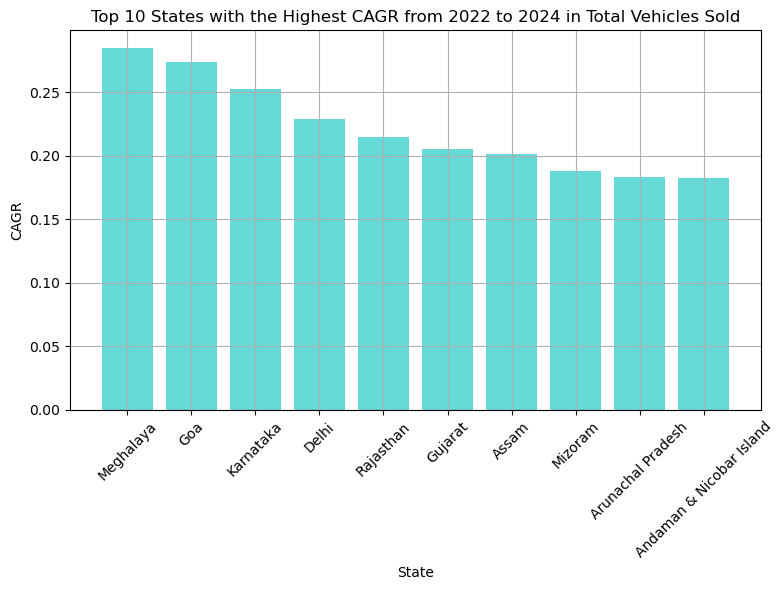

In [46]:
# Plot CAGR for top 10 states
plt.figure(figsize=(8,6))
plt.bar(top_10_states_cagr.index, top_10_states_cagr['CAGR'], color='c', alpha=0.6)
plt.xlabel('State')
plt.ylabel('CAGR')
plt.title('Top 10 States with the Highest CAGR from 2022 to 2024 in Total Vehicles Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 8: Peak and Low Season Months for EV Sales from 2022 to 2024

In [47]:
# Extract month and year
merged_state_data['month'] = merged_state_data['date'].dt.month
merged_state_data['year'] = merged_state_data['date'].dt.year

# Group by month and year to get total EV sales
monthly_sales = merged_state_data.groupby(['year', 'month'])['electric_vehicles_sold'].sum().reset_index()

# Calculate average monthly sales
avg_monthly_sales = monthly_sales.groupby('month')['electric_vehicles_sold'].mean().reset_index()

# Identify peak and low season months
peak_month = avg_monthly_sales.nlargest(1,'electric_vehicles_sold')
low_month = avg_monthly_sales.nsmallest(1,'electric_vehicles_sold')
peak_month,low_month

(   month  electric_vehicles_sold
 2      3            97195.666667,
    month  electric_vehicles_sold
 5      6            35569.666667)

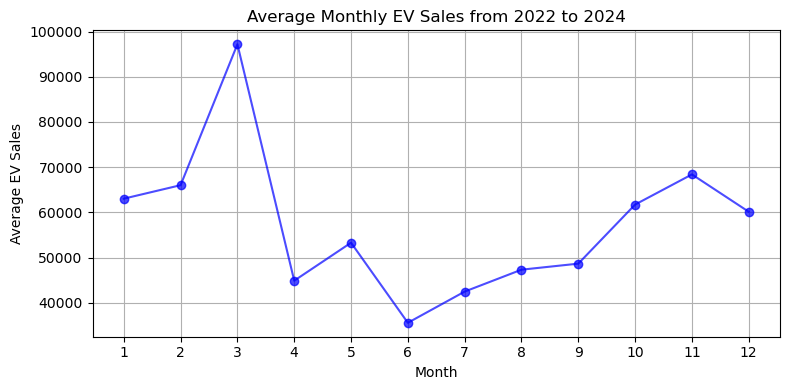

In [48]:
# Plot average monthly sales
plt.figure(figsize=(8,4))
plt.plot(avg_monthly_sales['month'], avg_monthly_sales['electric_vehicles_sold'], marker='o', color='b', linestyle='-', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average EV Sales')
plt.title('Average Monthly EV Sales from 2022 to 2024')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 9: Projected Number of EV Sales for Top 10 States by Penetration Rate in 2030

Future CAGR can be calculated as:
$
FV = PV \times (1 + r)^n
$

Where:
- **FV** is the future value of the investment, including growth/interest.
- **PV** is the present value of the investment.
- **r** is the annual interest rate.
- **n** is the number of years the money is invested.


In [49]:
# Calculate total EV sales and penetration rates for 2024
penetration_rate_2024 = filtered_state_data_2024.groupby('state')[['electric_vehicles_sold', 'total_vehicles_sold']].sum()
penetration_rate_2024['penetration_rate'] = penetration_rate_2024['electric_vehicles_sold'] / penetration_rate_2024['total_vehicles_sold']

# Identify top 10 states by penetration rate for 2024
top_10_states_penetration = penetration_rate_2024.nlargest(10, 'penetration_rate')
top_10_states_penetration

,electric_vehicles_sold,total_vehicles_sold,penetration_rate
state,,,
Goa,10799,78524,0.137525
Kerala,73938,638114,0.115870
Karnataka,160989,1581988,0.101764
Maharashtra,197169,2293994,0.085950
Delhi,46724,606348,0.077058
Chandigarh,2877,45147,0.063725
Odisha,39118,618149,0.063282
Chhattisgarh,28540,503068,0.056732
Tamil Nadu,94314,1716940,0.054931


In [50]:
# Calculate total vehicles sold in each state for 2022 and 2024
state_sales_2022 = merged_state_data[merged_state_data['fiscal_year'] == 2022].groupby('state')['electric_vehicles_sold'].sum()
state_sales_2024 = merged_state_data[merged_state_data['fiscal_year'] == 2024].groupby('state')['electric_vehicles_sold'].sum()
# Join the sales data
state_sales_cagr = pd.DataFrame({'sales_2022': state_sales_2022, 'sales_2024': state_sales_2024}).dropna()
# Calculate CAGR
state_sales_cagr['CAGR'] = ((state_sales_cagr['sales_2024'] / state_sales_cagr['sales_2022']) ** (1 / 2)) - 1

# Calculate CAGR for these states from 2022 to 2024
state_sales_cagr_2022_2024 = state_sales_cagr.loc[top_10_states_penetration.index]
state_sales_cagr_2022_2024['penetration_rate']=top_10_states_penetration['penetration_rate']
state_sales_cagr_2022_2024

,sales_2022,sales_2024,CAGR,penetration_rate
state,,,,
Goa,1778,10799,1.464483,0.137525
Kerala,13639,73938,1.328320,0.115870
Karnataka,43111,160989,0.932431,0.101764
Maharashtra,48374,197169,1.018893,0.085950
Delhi,16535,46724,0.681001,0.077058
Chandigarh,411,2877,1.645751,0.063725
Odisha,9498,39118,1.029421,0.063282
Chhattisgarh,4534,28540,1.508917,0.056732
Tamil Nadu,36863,94314,0.599531,0.054931


In [51]:
# Project EV sales for 2030
projected_sales_2030 = (state_sales_cagr_2022_2024['sales_2024'] * (1 + state_sales_cagr_2022_2024['CAGR']) ** 6).reset_index()

# Assign a column name to the projected sales
projected_sales_2030.columns = ['state', 'projected_sales_2030']
projected_sales_2030['penetration_rate']=state_sales_cagr_2022_2024['penetration_rate'].values
# Sort the DataFrame in descending order by 'projected_sales_2030'
projected_sales_2030 = projected_sales_2030.sort_values(by='penetration_rate', ascending=False).reset_index(drop=True)
projected_sales_2030

,state,projected_sales_2030,penetration_rate
0,Goa,2.419574e+06,0.137525
1,Kerala,1.177940e+07,0.115870
2,Karnataka,8.383406e+06,0.101764
3,Maharashtra,1.335115e+07,0.085950
4,Delhi,1.054259e+06,0.077058
5,Chandigarh,9.868110e+05,0.063725
6,Odisha,2.732814e+06,0.063282
7,Chhattisgarh,7.118219e+06,0.056732
8,Tamil Nadu,1.579547e+06,0.054931
9,Puducherry,2.329365e+05,0.053699


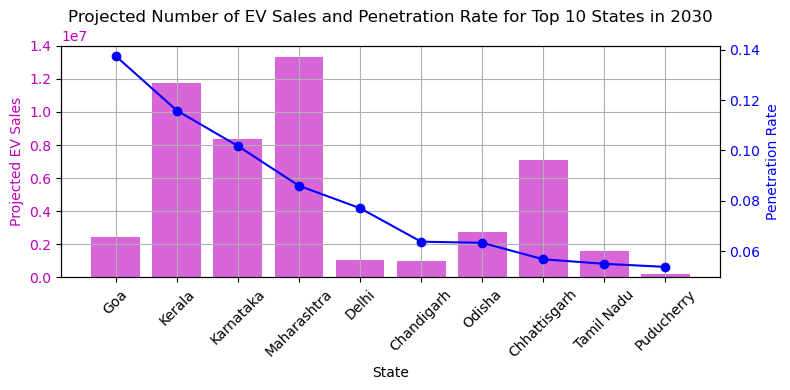

In [52]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot projected sales on the left y-axis
ax1.bar(projected_sales_2030['state'], projected_sales_2030['projected_sales_2030'], color='m', alpha=0.6)
ax1.set_xlabel('State')
ax1.set_ylabel('Projected EV Sales', color='m')
ax1.tick_params(axis='y', labelcolor='m')

# Create a second y-axis to plot the penetration rate
ax2 = ax1.twinx()
ax2.plot(projected_sales_2030['state'], projected_sales_2030['penetration_rate'], color='b', marker='o')
ax2.set_ylabel('Penetration Rate', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add title and grid
plt.title('Projected Number of EV Sales and Penetration Rate for Top 10 States in 2030')
ax1.set_xticklabels(projected_sales_2030['state'], rotation=45)
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



### Question 10: Estimate Revenue Growth Rate of EVs in India for 2022 vs 2024 and 2023 vs 2024

In [53]:
# Define average unit prices
price_2w = 85000
price_4w = 1500000

# Calculate total revenue for each year
total_revenue = merged_state_data.groupby(['fiscal_year', 'vehicle_category'])['electric_vehicles_sold'].sum().unstack()
total_revenue['2-Wheelers'] = total_revenue['2-Wheelers'] * price_2w
total_revenue['4-Wheelers'] = total_revenue['4-Wheelers'] * price_4w

# Calculate total revenue for each year
total_revenue['Total'] = total_revenue['2-Wheelers'] + total_revenue['4-Wheelers']
total_revenue

vehicle_category,2-Wheelers,4-Wheelers,Total
fiscal_year,,,
2022,21468705000,27865500000,49334205000
2023,61871755000,71197500000,133069255000
2024,79278820000,130351500000,209630320000


In [54]:
# Calculate revenue growth rate
revenue_growth_2022_2024 = (total_revenue.loc[2024, 'Total'] - total_revenue.loc[2022, 'Total']) / total_revenue.loc[2022, 'Total']
revenue_growth_2023_2024 = (total_revenue.loc[2024, 'Total'] - total_revenue.loc[2023, 'Total']) / total_revenue.loc[2023, 'Total']
revenue_growth_2022_2024, revenue_growth_2023_2024

(3.2491881646820904, 0.5753475135935795)

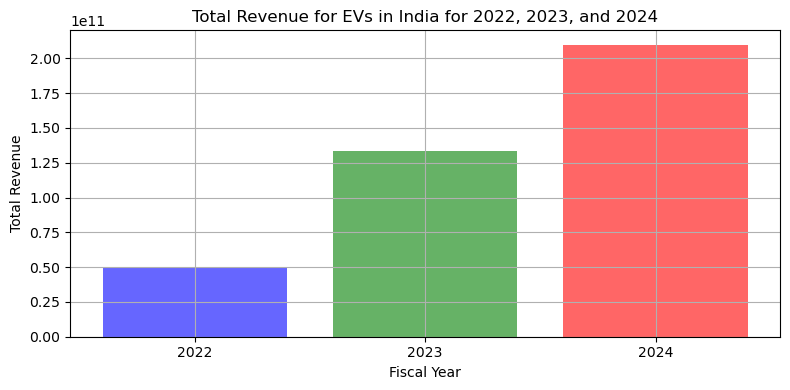

In [55]:
# Plot revenue for 2022, 2023, and 2024
plt.figure(figsize=(8,4))
plt.bar(total_revenue.index, total_revenue['Total'], color=['b', 'g', 'r'], alpha=0.6)
plt.xlabel('Fiscal Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for EVs in India for 2022, 2023, and 2024')
plt.xticks(total_revenue.index)
plt.grid(True)
plt.tight_layout()
plt.show()